<a href="https://colab.research.google.com/github/ua-datalab/MLWorkshops/blob/main/Classification_Algorithms/MLClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning: Classification Algorithms.

**Jupyter Notebook Example for notes on [Supervised ML: Classification](https://github.com/ua-datalab/MLWorkshops/wiki/Supervised-ML:-Classification-Algorithms)**

(Updated: 02/10/2025, Carlos Lizárraga.[UArizona DataLab](https://ua-datalab.github.io/))

***

We will use the [Palmer's Penguins dataset](https://github.com/allisonhorst/palmerpenguins) and create different models for classifying the dataset by species.




![](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)

We will use the [scikit-learn library](https://scikit-learn.org/stable/index.html) functions for [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) cases.

***


We first load all the required libraries to the running environment:

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Specific scikit-learn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score
import sklearn.metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read the Penguins dataset fom Github and define a Pandas dataframe

filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"
df_dist = pd.read_csv(filename)
df_dist.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Note:** Google Colab offers AI help in analyzing the dataframe and provides some data plotting suggestions for visualizing your data. (Optional)

### Data cleaning and manipulation


We will use the [Pandas Library](https://pandas.pydata.org/docs/reference/index.html) for data cleaning and manipulation.

(Please review the basics of [Pandas](https://github.com/ua-datalab/Workshops/wiki/Data-Wrangling-101:-Pandas-in-Action) from our learning resources page)
***

### Data manipulation and cleaning

Check for missing values and appropriate data type of the variables

In [4]:
# Inquiry about the state of the original distribution dataset

df_dist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Check if there are any missing values (isnull)

df_dist.isnull().any()


,0
species,False
island,False
culmen_length_mm,True
culmen_depth_mm,True
flipper_length_mm,True
body_mass_g,True
sex,True


In [6]:
# Eliminate the rows with missing values (dropna), and define a new dataframe df

df = df_dist.dropna(axis = 0, how ='any')


In [7]:
# Should have a clean dataframe with no missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


### Label encoding of categorical variables

We can use Scikit-learn built-in function: [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the categorical values into numeric values.

The categorial variables in our case are:
- species
- island
- sex


***

We can use the dataframe [value_counts function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts) to count values in each variable.  

In [8]:
# See the different values of the above variables

print('Species: \n', df.species.value_counts())
print('Island: \n', df.island.value_counts())
print('Gender: \n', df.sex.value_counts())


Species: 
 species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64
Island: 
 island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64
Gender: 
 sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


There is a row where the gender of the penguin has value of ".", then we need to eliminte that row, using a filter condition.

In [9]:
# Keep or filter out all rows where the sex of the Penguins is not equal to '.'

df = df[df.sex != '.']
print('Gender: \n', df.sex.value_counts())


Gender: 
 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [10]:
# We check the status of our dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


We are ready to encode the categorical variables

In [11]:
# Ready to encode categorical variables (encode names with values)

le = LabelEncoder()

df['species_encoded']= le.fit_transform(df['species'])
df['island_encoded']= le.fit_transform(df['island'])
df['sex_encoded']= le.fit_transform(df['sex'])
print(df.head())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  island_encoded  sex_encoded  
0       3750.0    MALE                0               2            1  
1       3800.0  FEMALE                0               2            0  
2       3250.0  FEMALE                0               2            0  
4       3450.0  FEMALE                0               2            0  
5       3650.0    MALE                0               2            1  


So, now the values of the encoded variables are:

`species_encoded` = [0,1, or 2];
`island_encoded` = [0,1, or 2]; and `sex_encoded` = [0 or 1]


## Checking for outlier values in the dataset

[John Tukey](https://en.wikipedia.org/wiki/John_Tukey) also gives a criteria for defining outlier data. If _Q1_, and _Q3_ are the first and third quartile positions, the interquartile range _IQR = Q3 - Q1_ , then an outlier value will fall below _Q1 - 1.5 IQR_ or above _Q3 + 1.5 IQR_.

We can define an additional Tukey outer fences, lower outer fence _Q1 - 3.0 IQR_ and the upper outer fence above _Q3 + 3.0 IQR_.


![](https://camo.githubusercontent.com/12ec987141cca879108f558c86b64a20fc7370e66de248813393fa5117f06907/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f76322f726573697a653a6669743a313430302f312a552d72524e6c54684c447a647059716e4930524131772e706e67)

In [12]:
#Tukey's method

def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    ifl, ifu = inner_fence_le, inner_fence_ue

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    ofl, ofu = outer_fence_le, outer_fence_ue


    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss, ifl, ifu, ofl, ofu



In [13]:
# Check for outliers in each numeric variable: culmen length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [14]:
# Check for outliers in each numeric variable: culmen depth

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_depth_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [15]:
# Check for outliers in each numeric variable: flipper length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'flipper_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [16]:
# Check for outliers in each numeric variable: body mass

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'body_mass_g')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


There are no outliers.

***

## Visualizing the data

We will use the [Matplotlib.Pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) and [Seaborn](https://seaborn.pydata.org/) libraries.

Remember we are using the aliases (see first code cell):
```
import matplotlib.pyplot as plt
import seaborn as sns
```
The specific functions used below are:
* [matplotlib.pyplot.subplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.subplot.html). Add an Axes to the current figure or retrieve an existing Axes.
* [matplotlib.pyplot.show](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.show.html). To display all open figures.
* [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot). Plot univariate or bivariate histograms to show distributions of datasets.
* [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html). Show point estimates and errors as rectangular bars.



In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,2,1


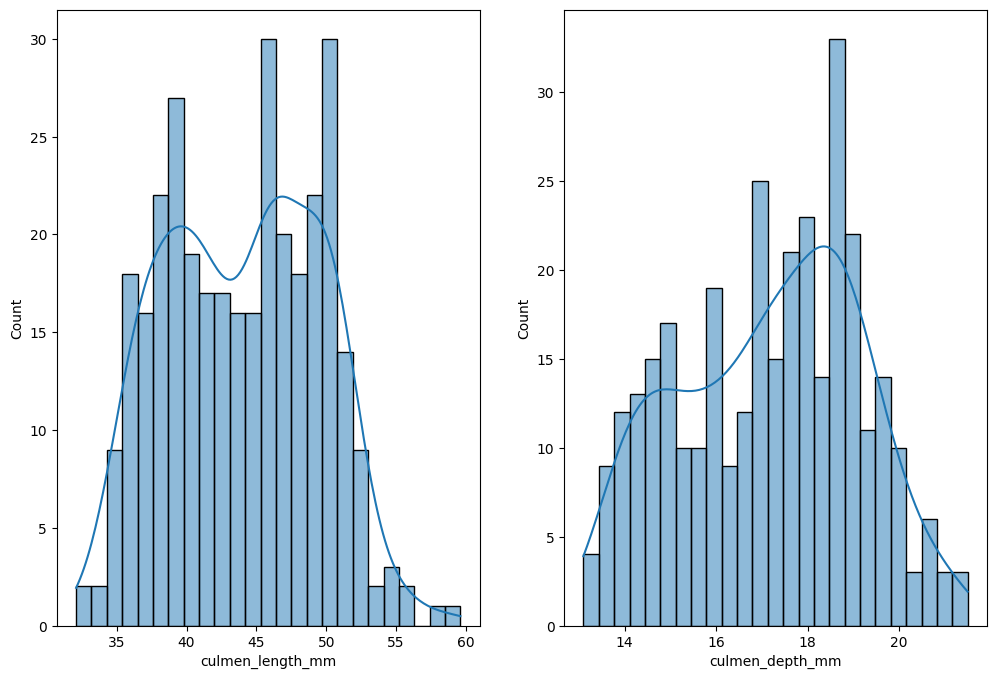

In [20]:
# Plot data frequency distribution for first two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['culmen_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['culmen_depth_mm'], bins=25, kde=True, ax=ax2);
plt.show()


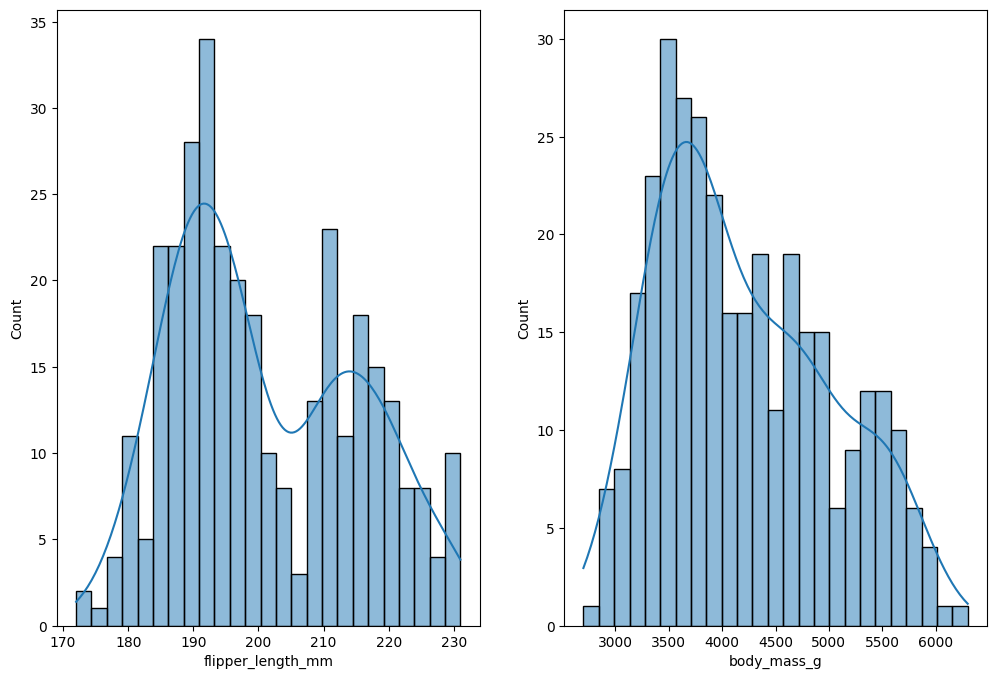

In [ ]:
# Plot data frequency distribution for last two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['flipper_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['body_mass_g'], bins=25, kde=True, ax=ax2);
plt.show()


### Separating by species

We get a more detailed data distribution plot

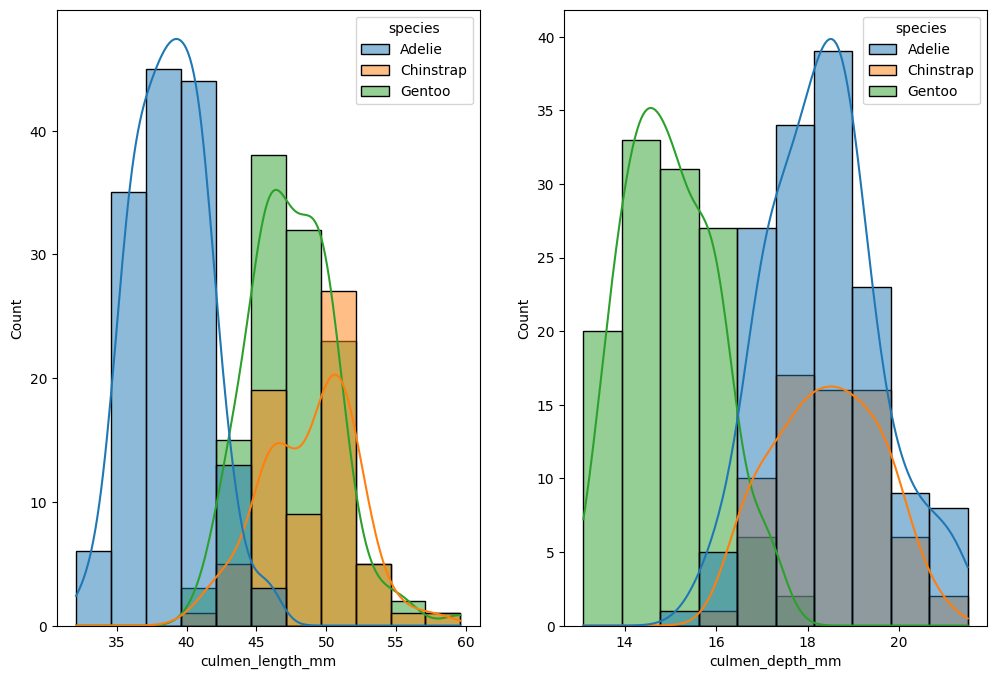

In [23]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(data=df, x="culmen_length_mm", hue="species", kde=True, ax=ax1);
sns.histplot(data=df, x="culmen_depth_mm", hue="species", kde=True, ax=ax2);
plt.show()



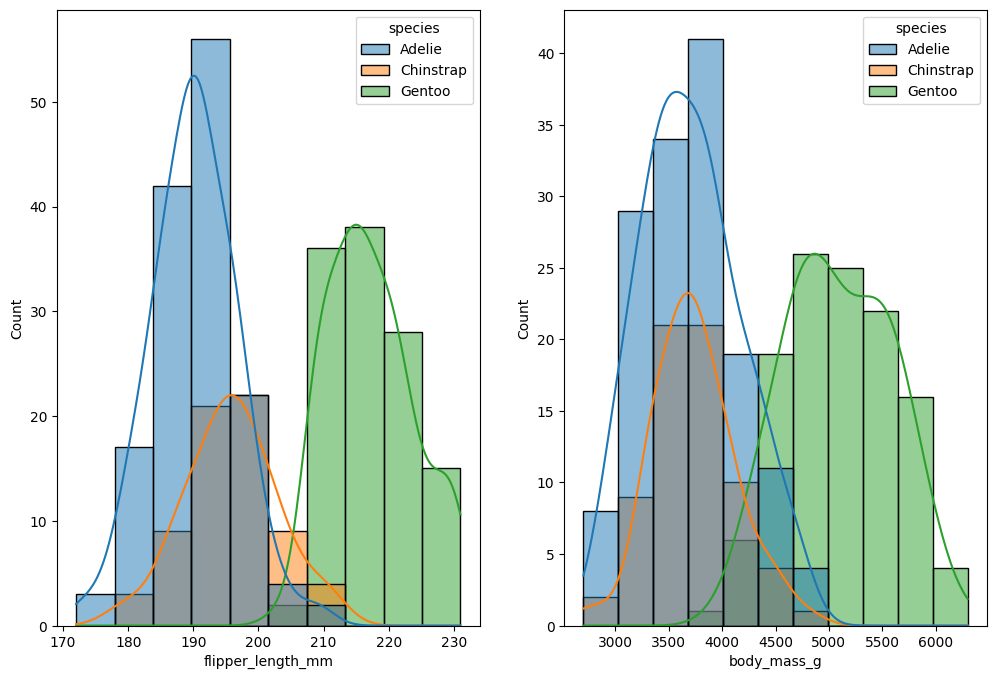

In [24]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(data=df, x="flipper_length_mm", hue="species", kde=True, ax=ax1);
sns.histplot(data=df, x="body_mass_g", hue="species", kde=True, ax=ax2);
plt.show()


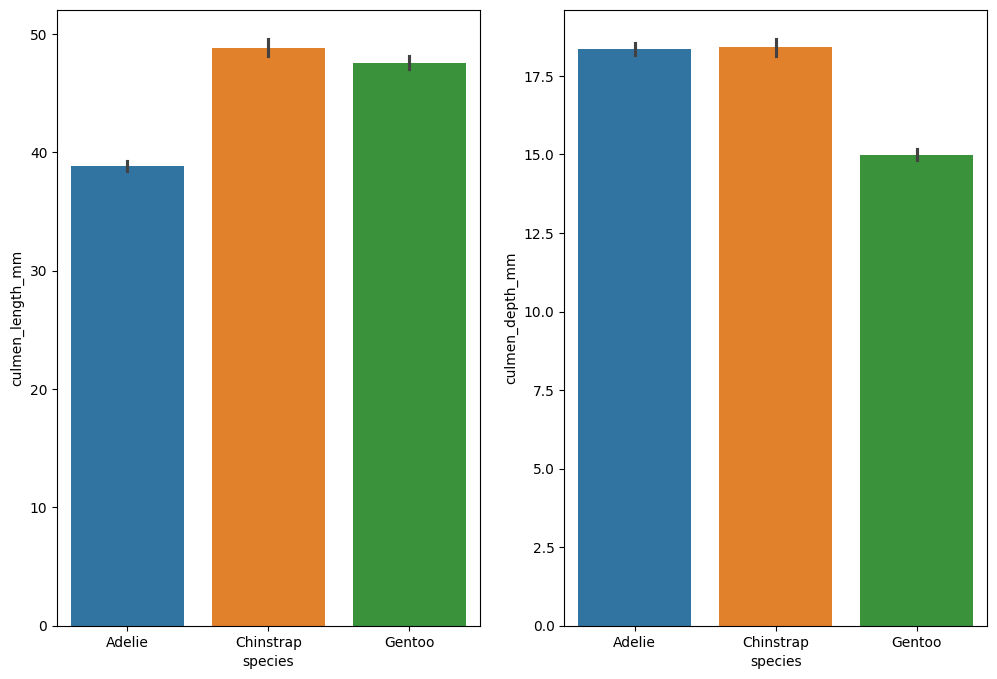

In [ ]:
# Using barplots.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='culmen_length_mm', data=df, ax=ax1, hue='species')
sns.barplot(x='species', y='culmen_depth_mm', data=df, ax=ax2, hue='species')

plt.show()


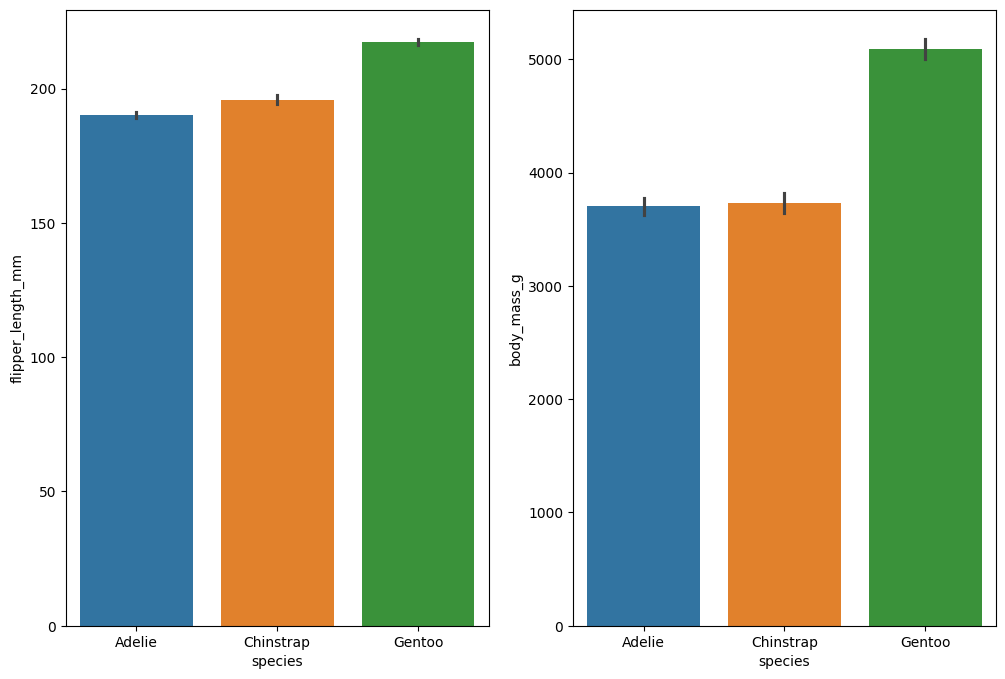

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='flipper_length_mm', data=df, ax=ax1, hue='species')
sns.barplot(x='species', y='body_mass_g', data=df, ax=ax2, hue='species')

plt.show()


## Splitting the data into Training & Testing datasets

Now, we continue with training for our classification model, classifying penguins by gender (target variable).

We use the Scikit-learn [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), to split arrays or matrices into random train and test subsets.

Usually, 80% of the data is used for training the model and 20% for testing it. A `random_state` variable is set for reproducibility purposes.



![](https://camo.githubusercontent.com/1bb83b542fd6d874fdda26997b928be439506f4a0c1ee29aa39453b409d72fb5/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f76322f726573697a653a6669743a3732302f666f726d61743a776562702f312a535335316c61564e4148455849634a4479486b3369772e706e67)

In [82]:
features=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g','island_encoded', 'species_encoded']

x=df[features]        # these are the features we define them as "x"
y=df['sex_encoded'] # the species gender is the output or label we'll call it as "y"

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

print("\n Shape of x_train:\n{}".format(x_train.shape))
print("\n Shape of x_test:\n{}".format(x_test.shape))
print("\n Shape of y_train:\n{}".format(y_train.shape))
print("\n Shape of y_test:\n{}".format(y_test.shape))



 Shape of x_train:
(266, 6)

 Shape of x_test:
(67, 6)

 Shape of y_train:
(266,)

 Shape of y_test:
(67,)


In [87]:
y_train.head()

,sex_encoded
230,0
84,0
303,1
22,0
29,1


## Scaling

We will next use the Scikit-learn [StandardScaler function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), to standardize features by removing the mean and scaling to unit variance, i.e. a normal distribution of `mean=0`, and  `stddev=1`, show in _red color_ below.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

In [84]:
# Apply the scaler transformation
sc = StandardScaler()

scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

print(x_train.head())
print("________________________ Transformed variables (first 5 rows) ____________________________________________________")
print(scaled_x_train[0:4])


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
230              40.9             13.7              214.0       4650.0   
84               37.3             17.8              191.0       3350.0   
303              50.0             15.9              224.0       5350.0   
22               35.9             19.2              189.0       3800.0   
29               40.5             18.9              180.0       3950.0   

     island_encoded  species_encoded  
230               0                2  
84                1                0  
303               0                2  
22                0                0  
29                0                0  
________________________ Transformed variables (first 5 rows) ____________________________________________________
[[-0.59372706 -1.75093934  0.9359428   0.53973681 -0.91721936  1.20687977]
 [-1.26104283  0.32310698 -0.719956   -1.07236416  0.52645135 -1.04596247]
 [ 1.09309891 -0.63803644  1.65589881  1.40779118 -0.917

## Training the models

We will train the following three Scikit-learn Classifier models for comparison:

* [KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Support Vector Classifier - SVC](https://scikit-learn.org/stable/modules/svm.html#classification)

In [124]:
# KNeaighbors Classifier model 1

x_trainSC=scaled_x_train
x_testSC=scaled_x_test

# Fit the model to training data
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_trainSC, y_train)

# Predict the response for test dataset
y_prediction1= model1.predict(x_testSC)

report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values']= y_prediction1
print(report)

# Decision Tree Classifier model 2

# Fit the model to training data
model2= DecisionTreeClassifier(max_depth=3)
model2.fit(x_trainSC,y_train)

# Predict the response for test dataset
y_prediction2 = model2.predict(x_testSC)
report['Actual values']=y_test
report['Predicted values']= y_prediction2
print(report)

# Support Vector Classifier model 3

# Fit the model to training data
model3= svm.SVC(kernel='linear',probability=True) # Linear Kernel
model3.fit(x_trainSC, y_train)

#Predict the response for test dataset
y_prediction3 = model3.predict(x_testSC)
report['Actual values']=y_test
report['Predicted values']= y_prediction3
print(report)

# MLP CLassifier

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                    hidden_layer_sizes=(5, 2), random_state=1)
#clf.fit(X, y)

     Actual values  Predicted values
30               0                 0
317              0                 0
79               1                 1
201              0                 1
63               1                 1
..             ...               ...
288              0                 0
4                0                 0
83               1                 1
319              1                 1
66               0                 0

[67 rows x 2 columns]
     Actual values  Predicted values
30               0                 0
317              0                 0
79               1                 1
201              0                 0
63               1                 1
..             ...               ...
288              0                 0
4                0                 0
83               1                 0
319              1                 1
66               0                 0

[67 rows x 2 columns]
     Actual values  Predicted values
30               0           

### Model evaluation

In the domain of machine learning, particularly concerning the issue of statistical classification, a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix), alternatively referred to as an **error matrix**, constitutes a particular tabular structure that facilitates the visualization of an algorithm's efficacy, most commonly associated with supervised learning methodologies.

![](https://github.com/clizarraga-UAD7/Workshops/raw/main/ConfusionMatrix.png?raw=true)

We use the Scikit-learn [confusion matrix function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to evaluate each model error.

To help visualize the confusion matrix, Seaborn provides the [seaborn.heatmap function](https://seaborn.pydata.org/generated/seaborn.heatmap.html), which is very useful in these cases.  

In [125]:
ConfusionMatrix1=confusion_matrix(y_test,y_prediction1)
print(ConfusionMatrix1)

ConfusionMatrix2=confusion_matrix(y_test,y_prediction2)
print(ConfusionMatrix2)

ConfusionMatrix3=confusion_matrix(y_test,y_prediction3)
print(ConfusionMatrix3)


[[32  5]
 [ 2 28]]
[[31  6]
 [ 5 25]]
[[33  4]
 [ 3 27]]


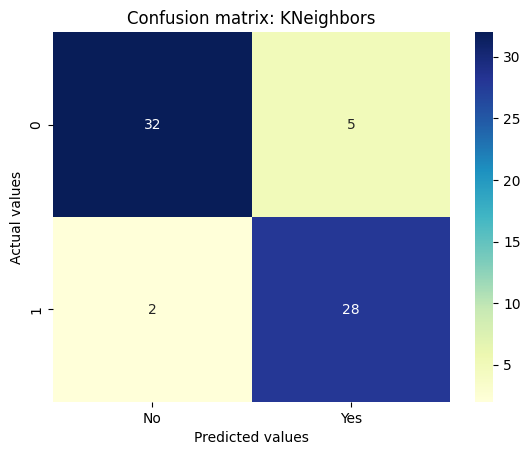

In [126]:
# Heatmap of First Confusion Matrix: KNearest Neighbor

ax=sns.heatmap(ConfusionMatrix1, annot=True, cmap="YlGnBu")
ax.set_title('Confusion matrix: KNeighbors')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
# Tick labels:
ax.xaxis.set_ticklabels(['No','Yes'])
#ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


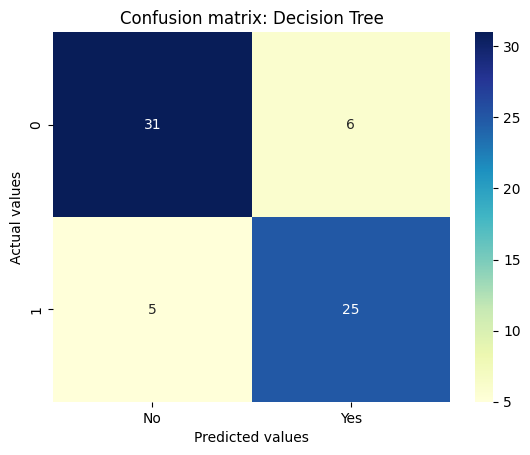

In [127]:
# Second Confusion Matrix: Decision Tree

ax=sns.heatmap(ConfusionMatrix2, annot=True, cmap="YlGnBu")
ax.set_title('Confusion matrix: Decision Tree')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Tick labels:
ax.xaxis.set_ticklabels(['No','Yes'])
# ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


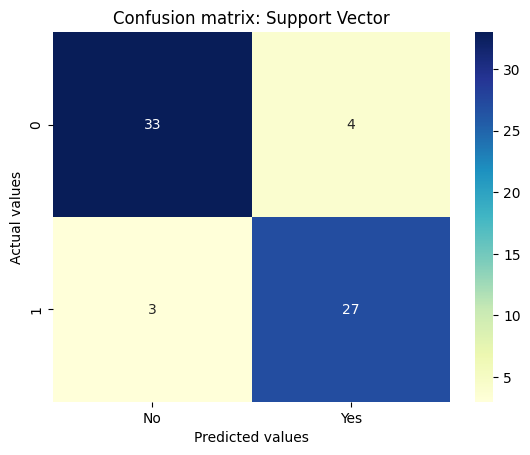

In [128]:
# Third Confusion Matrix: Support Vector

ax=sns.heatmap(ConfusionMatrix3, annot=True, cmap="YlGnBu")
ax.set_title('Confusion matrix: Support Vector')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


## ROC Scores and Curve

[Receiver operating characteristics (ROC) curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) are graphs showing the binary classifiers' performance by plotting the true positive rate and false positive rate.

Scikit-lear provide the [classification_report function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#classification-report), that returns various performance metrics:

* [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [f1-score](https://en.wikipedia.org/wiki/F-score)
* [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_classification)

See all the possible [metrics definitions](https://en.wikipedia.org/wiki/Precision_and_recall#Definition) in binary classifications.



In [129]:
from sklearn.metrics import classification_report
print("KNeighbors")
print(classification_report(y_test, y_prediction1))
print("Decision Tree")
print(classification_report(y_test, y_prediction2))
print("Support Vector")
print(classification_report(y_test, y_prediction3))


KNeighbors
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.85      0.93      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67

Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.81      0.83      0.82        30

    accuracy                           0.84        67
   macro avg       0.83      0.84      0.83        67
weighted avg       0.84      0.84      0.84        67

Support Vector
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.87      0.90      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90 

In [130]:
# Define an ROC plot

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [99]:
len(y_train)

266

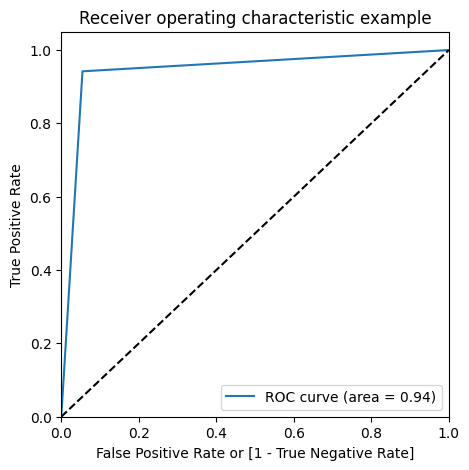

In [131]:
# ROC Curve for model 1: KNeighbors Classifier

# Getting the predicted values on the train set
y_train_pred1 = model1.predict(x_trainSC)
#print(y_train_pred1[:10])

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_train_pred1, drop_intermediate = False )
draw_roc(y_train, y_train_pred1)


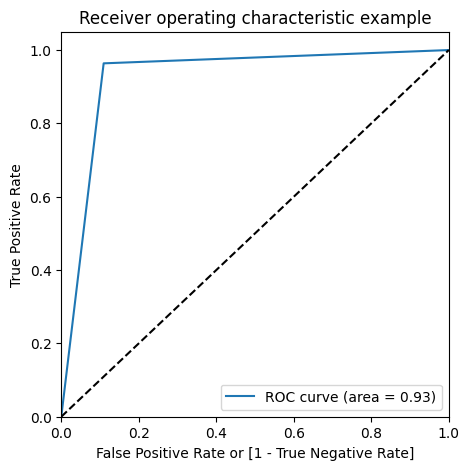

In [132]:
# ROC Curve for model 2: Decision Tree Classifier

# Getting the predicted values on the train set
y_train_pred2 = model2.predict(x_trainSC)
#print(y_train_pred2[:10])

fpr2, tpr2, thresholds2 = roc_curve(y_train, y_train_pred2, drop_intermediate = False)
draw_roc(y_train, y_train_pred2)


Decision Tree Classifier is the best algorithm.

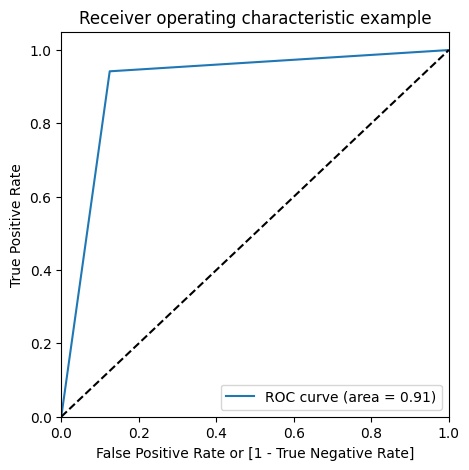

In [133]:
# ROC Curve for model 3: SVM Classifier

# Getting the predicted values on the train set
y_train_pred3 = model3.predict(x_trainSC)
#y_train_pred3[:10]

fpr3, tpr3, thresholds3 = roc_curve(y_train, y_train_pred3, drop_intermediate = False )
draw_roc(y_train, y_train_pred3)
